In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.9


In [2]:
# Teste watermark no visual studio
import watermark
print("Watermark instalado corretamente.")


Watermark instalado corretamente.


In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys, os
warnings.filterwarnings("ignore")

In [4]:
# Adicionando o caminho para os módulos Python
sys.path.append(os.path.abspath(os.path.join('modulos')))
from estrategia1 import *     # contém detalhes para tratamento de valores ausentes
from estrategia2 import *
from estrategia3 import *

In [5]:
# Configurando para o pandas o número máximo de colunos a serem mostradas
pd.set_option('display.max_columns', 100)

In [6]:
# Versão dos pacotes usados neste jupyter
%reload_ext watermark
%watermark -a 'DSA' --iversions

Author: DSA

seaborn   : 0.12.2
pandas    : 1.5.3
sys       : 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
numpy     : 1.23.5
matplotlib: 3.7.0
watermark : 2.4.3



### Carregando os dados

In [7]:
# Carregando o dataset
dataset = pd.read_csv('dados/dataset.csv')

In [8]:
# Shape
dataset.shape

(45211, 19)

In [9]:
# Amostra
dataset.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


### Análise Exploratória

In [10]:
# Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [11]:
# Verifica o percentual de valores ausentes
# Função do módulo estratégia 1
func_calc_percentual_valores_ausentes(dataset)

O dataset tem 0.01 % de valores ausentes.


In [12]:
# Cria tabela com valores ausentes
df_missing = func_calc_percentual_valores_ausentes_coluna(dataset)

O dataset tem 19 colunas.
Encontrado: 4 colunas que têm valores ausentes.


In [13]:
# Temos valores nulos? Sim ou Não?
dataset.isna().any()

customerid    False
age            True
salary         True
balance       False
marital       False
jobedu        False
targeted      False
default       False
housing       False
loan          False
contact       False
day           False
month          True
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
response       True
dtype: bool

In [14]:
# Temos valores nulos? Quantos?
dataset.isna().sum()

customerid     0
age           20
salary        26
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [15]:
# Não usaremos a coluna ID. Vamos removê-la.
dataset.drop(['customerid'], axis = 1, inplace=True)

In [16]:
# Colunas existentes
dataset.columns

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

Sugestão de Exercício(1): A coluna "jobedu" parece ter duas informações. Vamos separar em duas colunas.

In [17]:
# Tentativa durval
dataset['jobedu'].str.split(',', expand=True)

,0,1
0,management,tertiary
1,technician,secondary
2,entrepreneur,secondary
3,blue-collar,unknown
4,unknown,unknown
...,...,...
45206,technician,tertiary
45207,retired,primary
45208,retired,secondary
45209,blue-collar,secondary


In [18]:
# Correção com o professor
# Fazemos o split da coluna jobedu e criamos a coluna job com o primeiro elemento antes da vírgula
dataset['job'] = dataset['jobedu'].apply(lambda x:x.split(",")[0])

forma de ler a função lambda(anônima) acima:
o método .applay entra numa espécie de lupe, vai repetir uma coluna
-> pegue o valor de x e faça o split pela vírgula
-> retorne o valor de x no índice [0]

In [19]:
dataset.head(1)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management


In [20]:
# Fazemos o split da coluna jobedu e criamos a coluna education com o segundo elemento antes da vírgula
dataset['education'] = dataset['jobedu'].apply(lambda x:x.split(",")[1])

In [21]:
dataset.head(1)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary


In [22]:
# Drop da coluna "jobedu"
dataset.drop(('jobedu'), axis=1, inplace=True)

In [23]:
dataset.head(1)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary


## Tratamento de Valores Ausentes

#### Vamos primeiro tratar a variável que representa a idade.

In [24]:
# Valores ausentes no dataset
dataset.isna().any()

age           True
salary        True
balance      False
marital      False
targeted     False
default      False
housing      False
loan         False
contact      False
day          False
month         True
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
response      True
job          False
education    False
dtype: bool

In [25]:
# Valores ausentes da variável age
dataset.age.isnull().sum()

20

In [26]:
# Calcula o percentual de valores ausentes na variável age
dataset.age.isnull().mean()*100

0.0442370219636814

Como o percentual é baixo e nao podemos eliminar a coluna, podemos entao eliminar os registros com valores ausentes (nesse caso perderíamos 20 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção, imputação.

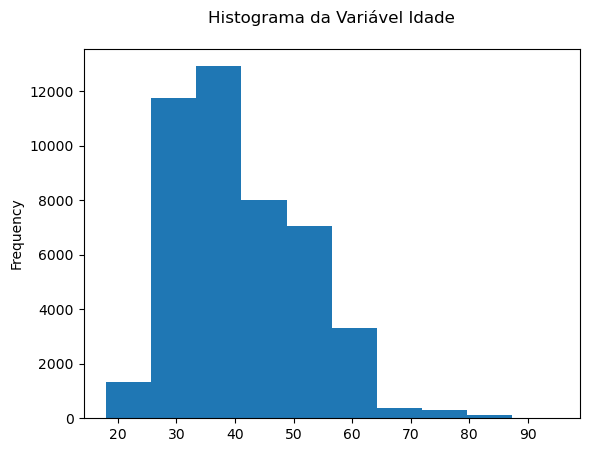

In [27]:
# Histograma
dataset.age.plot(kind='hist')
plt.title('Histograma da Variável Idade\n')
plt.show()

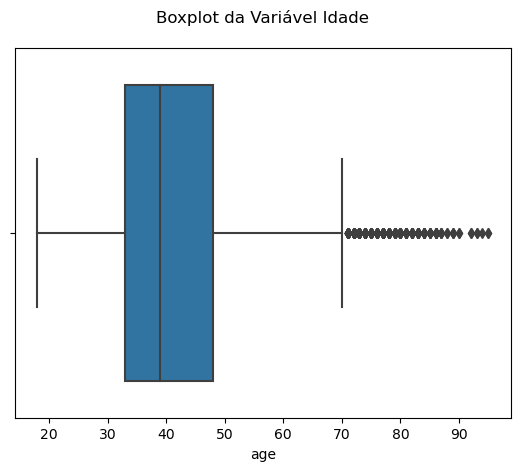

In [28]:
# Boxplot
sns.boxplot(x=dataset['age'], orient='h')
plt.title("Boxplot da Variável Idade\n")
plt.show()

In [29]:
# Vamos verificar qual é a media de idade.
dataset.age.mean()

40.93565090394105

In [30]:
# Vamos verificar a mediana, valor do meio da distribuição quando os dados estão ordenados.
dataset.age.median()

39.0

In [31]:
# Vamos verificar qual é a moda, o valor que mais se repete.
dataset.age.mode()

0    32.0
Name: age, dtype: float64

> Exercício 2: Vamos imputar os valores ausentes da variável age com uma medida de tendência central. Escolha uma das medidas, aplique a imputação e justifique sua escolha. Deixamos a variável como float ou como int? Se convertemos, fazemos isso antes ou depois da imputação?

In [32]:
# Vamos preencher com a MODA, pois são poucos valores ausentes e assim alteramos muito pouco o padrão nos dados.
dataset.age.fillna('32', inplace=True)

In [33]:
# Agora converteremos para int
dataset.age = dataset.age.astype('int')

In [34]:
# Tipo de variável
dataset.age.dtypes

dtype('int32')

In [35]:
# Média
dataset.age.mean()

40.93169803808808

In [36]:
# Mediana
dataset.age.median()

39.0

In [37]:
# Percentual de valores ausentes
dataset.age.isnull().mean()*100

0.0

##### Vamos agora tratar a variável que representa o mês.

In [38]:
# Valores ausentes na variável mês
dataset.month.isnull().sum()

50

In [39]:
# Percentual de valores ausentes
dataset.month.isnull().mean()*100

0.11059255490920351

Como o percentual é menor que 30% não podemos elimiinar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 50 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção, imputação.

In [40]:
# Tipo de variável
dataset.month.dtypes

dtype('O')

In [41]:
# Categorias da variável
dataset.month.value_counts()

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

>  Exercicio 3: Vamos imputar os valores ausentes da variável month. Escolha uma estratégia e aplique no dataset

In [42]:
# Vamos imputar com a moda, o valor mais frequente da variável, pois são poucos registros
dataset.month.mode()

0    may, 2017
Name: month, dtype: object

In [43]:
# Imputação com a moda
dataset.month.fillna("may, 2017", inplace=True)

In [44]:
# Valores ausentes tratados com sucesso
dataset.month.isnull().sum()

0

### Tratamento de Valores Ausentes

> Vamos agora tratar a variável que representa o salário

In [45]:
# Valores ausentes na variável salário
dataset.salary.isnull().sum()

26

####  Calcula o percentual de valores ausentes na vairável

In [46]:
# Calcula o percentual de valores ausentes na vairável salary
dataset.salary.isnull().mean()*100

0.05750812855278583

Como o PERCENTUAL É BAIXO, NÃO PODEMOS ELIMINAR A COLUNA. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 26 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção, a IMPUTAÇÃO.

> Fazendo uma checagem rapidinho nos valores da coluna <i>salary</i>

In [47]:
dataset.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,0.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


Existe salário igual a zero? Não. <br>
O valor zero é provavelmente um valor ausente (confirmar com a área de negócio).

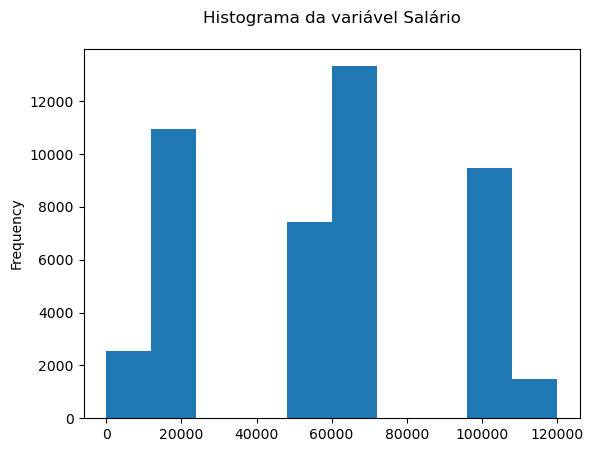

In [48]:
# Histograma
dataset.salary.plot(kind='hist')
plt.title('Histograma da variável Salário\n')
plt.show()

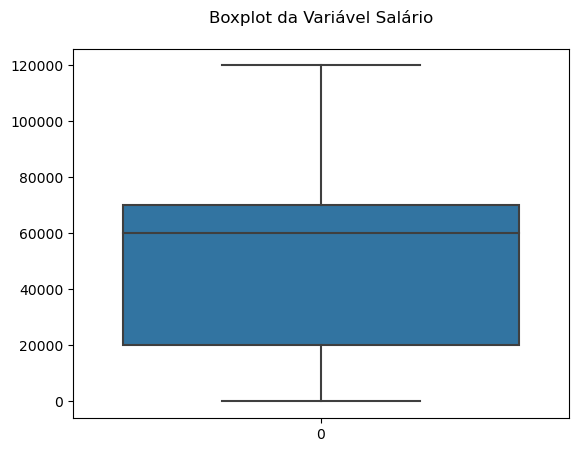

In [49]:
# Boxplot
sns.boxplot(dataset.salary)
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [50]:
# Vamos verificar qual é a média
dataset.salary.mean()

57008.65331415293

In [51]:
# Verificando a mediana
dataset.salary.median()

60000.0

In [52]:
# Moda
dataset.salary.mode()

0    20000.0
Name: salary, dtype: float64

> Exercício 4: Vamos imputar os valores ausentes da variável salary com uma medida de tendência central.<br> Precisamos também tratar os valores iguais a zero. Escolha sua estratégia, aplique a imputação e justifique sua escolha.

In [54]:
# Vamos preencher com a MEDIANA, pois os dados parecem assimétricos (nesse caso a média não pode ser usada)
# e o valor mais frequente está muito abaixo da média e da mediana (por isso não usaremos a moda)
dataset.salary.fillna('6000', inplace=True)

> OBS: as aspas em '6000' está informando ao python que se deseja converter o valor para o tipo OBJETCT ('O'), e ele faz isso de forma automática. foi deixado assim propositalmente para continuar o estudo mais abaixo.

In [55]:
dataset.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,0.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [58]:
# Histograma
dataset.salary.plot(kind='hist')
plt.title("Histograma da Variável Salário\n")
plt.show()

TypeError: no numeric data to plot

In [60]:
# Tipo de variável
dataset.salary.dtypes

dtype('O')

In [62]:
# Para resolver o problema acima, converte-se novamente o valor da variável para flot
dataset.salary = dataset.salary.astype('float')

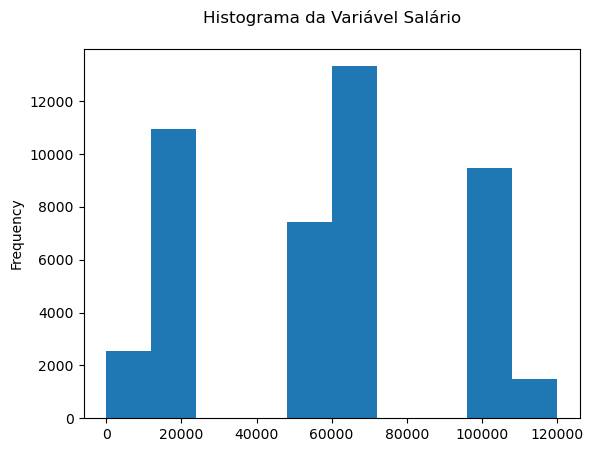

In [63]:
# Com a variável tratada, gerar novamente o histograma
dataset.salary.plot(kind='hist')
plt.title('Histograma da Variável Salário\n')
plt.show()

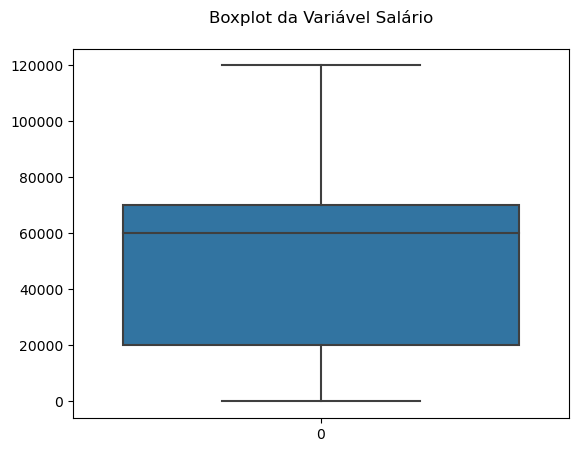

In [64]:
# Boxplot
sns.boxplot(dataset.salary)
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [65]:
# Registro para cada salário
dataset.salary.value_counts()

20000.0     9725
100000.0    9454
60000.0     9169
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
0.0          288
6000.0        26
Name: salary, dtype: int64

In [66]:
# Replace do zero para MEDIANA
dataset['salary']=dataset['salary'].replace(0, dataset['salary'].median())

In [68]:
# Registro para cada salário
dataset.salary.value_counts()

20000.0     9725
60000.0     9457
100000.0    9454
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
6000.0        26
Name: salary, dtype: int64

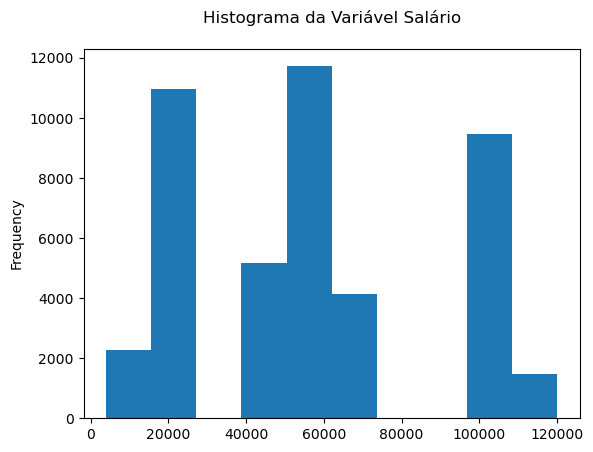

In [69]:
# Histograma
dataset.salary.plot(kind='hist')
plt.title('Histograma da Variável Salário\n')
plt.show()

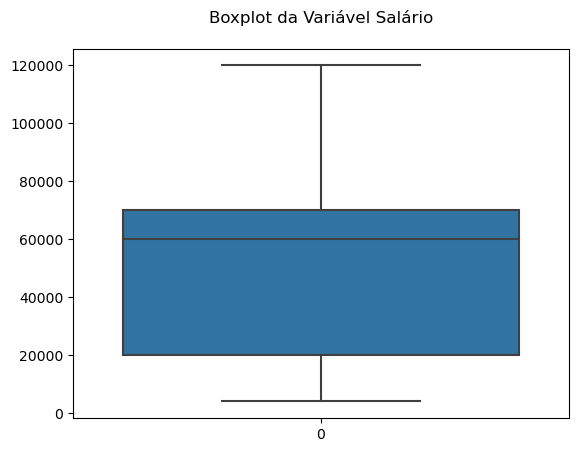

In [70]:
# Boxplot
sns.boxplot(dataset.salary)
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [72]:
# Calcula o percentual de valores ausentes na variável salary
dataset.salary.isnull().mean()*100

0.0

In [73]:
dataset.isna().any()

age          False
salary       False
balance      False
marital      False
targeted     False
default      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
response      True
job          False
education    False
dtype: bool

#### Valores Ausentes na Variável Response

In [74]:
 # Valores ausentes
 dataset.response.isnull().sum()

30

In [75]:
# Calcula o percentual
dataset.response.isnull().mean()*100

0.0663555329455221

Como o percentual é baixo (e a variável é o alvo da nossa análise) não podemos eliminar a coluna. <br>
Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 30 linhas no dataset) ou podemos aplicar imputação.

> Exercício 5: Escolha a estratégia, aplique e justifique a escolha.

>> A variável resposta é especial, então nao poderia or a média, moda ou mediana... Logo nao podemos aplicar imputação na variável de estudo, ALVO

In [76]:
# Vamos dropar os registros NA criando um subset 
# Vai pegar todos os registros NA apenas na variável RESPONSE
dataset.dropna(subset=['response'], inplace=True)

In [77]:
# Verifica valores NA
dataset.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

#### Tratamento de Valores Ausentes

> Vamos agora tratar a variável <i>pdays</i>

In [78]:
# Valores ausentes
# a variável pdays representa o período em dias para o pagamento, se o cliente pagou o emprestimo bancário
dataset.pdays.isnull().sum()

0

In [79]:
# Describe
dataset.pdays.describe()

count    45181.000000
mean        40.198601
std        100.134050
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

>> OBS: -1 indica valor ausente

In [83]:
# Vamos fazer relace de -1 por NaN
dataset.pdays = dataset.pdays.replace({-1.0:np.NaN})

In [84]:
# Valores ausentes
dataset.pdays.isnull().sum()

36930

In [85]:
# Calcula o percentual de valores ausentes
dataset.pdays.isnull().mean()*100

81.73789867422147

> Exercício 6: Escolha sua estratégia, aplique e justifique sua escolha.

81% de valores ausentes, faz-se o drop da coluna, pois é mais de 30% minimos de valores ausentes.

In [86]:
# Drop da coluna 'pdays' pois tem mais de 30% dos valores ausentes
dataset.drop(['pdays'], axis=1, inplace=True)

In [87]:
# Valores ausentes
dataset.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

### Conclusão e Análise dos Dados
#### Análise Univariada

In [88]:
# Proporção da variável de estado civil
dataset.marital.value_counts(normalize=True)

married     0.601912
single      0.282907
divorced    0.115181
Name: marital, dtype: float64

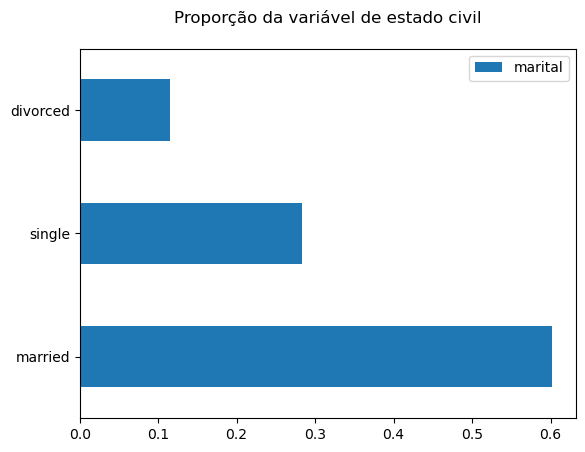

In [89]:
# Plot
dataset.marital.value_counts(normalize=True).plot(kind='barh')
plt.title('Proporção da variável de estado civil\n')
plt.legend()
plt.show()

In [90]:
# Proporção da variável job
dataset.job.value_counts(normalize=True)

blue-collar      0.215290
management       0.209247
technician       0.168035
admin.           0.114340
services         0.091853
retired          0.050087
self-employed    0.034860
entrepreneur     0.032890
unemployed       0.028840
housemaid        0.027423
student          0.020761
unknown          0.006374
Name: job, dtype: float64

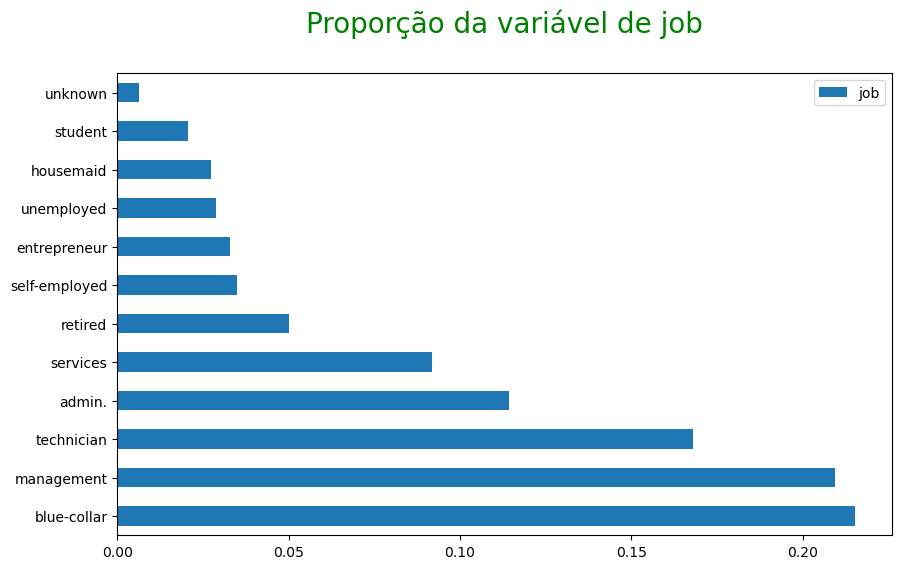

In [92]:
# Plot
plt.figure(figsize=(10, 6))
dataset.job.value_counts(normalize=True).plot(kind='barh')
plt.title("Proporção da variável de job\n", fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.legend()
plt.show()

In [93]:
# Proporção da variável education
dataset.education.value_counts(normalize=True)

secondary    0.513247
tertiary     0.294194
primary      0.151480
unknown      0.041079
Name: education, dtype: float64

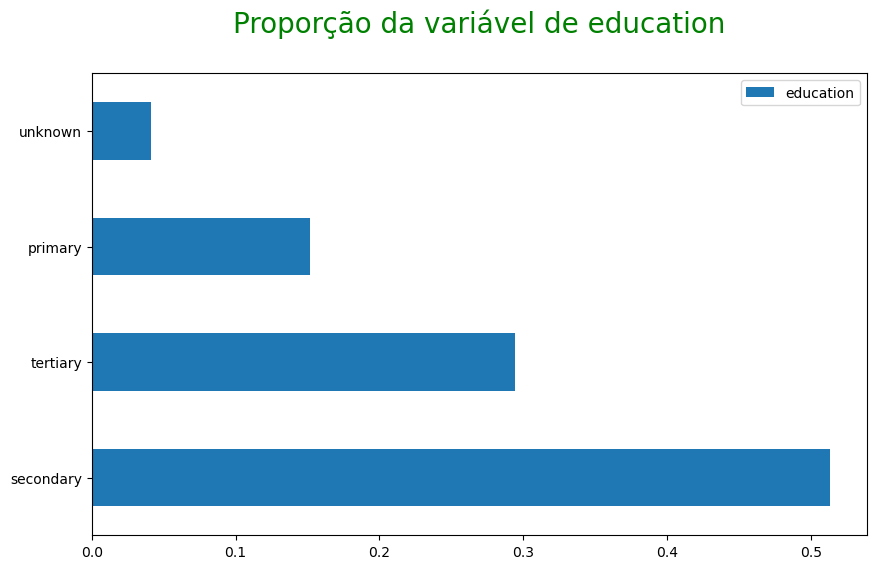

In [94]:
# Plot
plt.figure(figsize=(10, 6))
dataset.education.value_counts(normalize=True).plot(kind='barh')
plt.title("Proporção da variável de education\n", fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.legend()
plt.show()

In [95]:
# Proporção da variável response
dataset.response.value_counts(normalize=True)

no     0.882982
yes    0.117018
Name: response, dtype: float64